In [61]:
import pandas as pd
df = pd.read_csv('./Flight Delay Dataset 2018-2024/flight_data_2018_2024.csv')
print(df.head())

/var/folders/yc/3f8kwj3d1pbcbqszhq5l_8q00000gn/T/ipykernel_23084/785118709.py:2: DtypeWarning: Columns (11,13,86,93,94,101) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./Flight Delay Dataset 2018-2024/flight_data_2018_2024.csv')


   Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate  \
0  2024        1      1          14          7  2024-01-14   
1  2024        1      1          14          7  2024-01-14   
2  2024        1      1          14          7  2024-01-14   
3  2024        1      1          14          7  2024-01-14   
4  2024        1      1          14          7  2024-01-14   

  Marketing_Airline_Network Operated_or_Branded_Code_Share_Partners  \
0                        UA                            UA_CODESHARE   
1                        UA                            UA_CODESHARE   
2                        UA                            UA_CODESHARE   
3                        UA                            UA_CODESHARE   
4                        UA                            UA_CODESHARE   

   DOT_ID_Marketing_Airline IATA_Code_Marketing_Airline  ...  Div5Airport  \
0                     19977                          UA  ...          NaN   
1                     19977                   

In [62]:
print(df.shape)
print(df.columns.tolist())
print(df.info())

# Checking for missing values
print(df.isnull().sum().to_dict())
print(df.isnull().mean().multiply(100).round(2).to_dict())

(582425, 120)
['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate', 'Marketing_Airline_Network', 'Operated_or_Branded_Code_Share_Partners', 'DOT_ID_Marketing_Airline', 'IATA_Code_Marketing_Airline', 'Flight_Number_Marketing_Airline', 'Originally_Scheduled_Code_Share_Airline', 'DOT_ID_Originally_Scheduled_Code_Share_Airline', 'IATA_Code_Originally_Scheduled_Code_Share_Airline', 'Flight_Num_Originally_Scheduled_Code_Share_Airline', 'Operating_Airline ', 'DOT_ID_Operating_Airline', 'IATA_Code_Operating_Airline', 'Tail_Number', 'Flight_Number_Operating_Airline', 'OriginAirportID', 'OriginAirportSeqID', 'OriginCityMarketID', 'Origin', 'OriginCityName', 'OriginState', 'OriginStateFips', 'OriginStateName', 'OriginWac', 'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID', 'Dest', 'DestCityName', 'DestState', 'DestStateFips', 'DestStateName', 'DestWac', 'CRSDepTime', 'DepTime', 'DepDelay', 'DepDelayMinutes', 'DepDel15', 'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOut', 'Wheel

In [63]:
# Your challenge: Analyze delay patterns
print("DepDel15 value counts:")
print(df['DepDel15'].value_counts(dropna=False))

print("\nCancelled flights count:")
print(df['Cancelled'].value_counts())

print("\nDiverted flights count:")
print(df['Diverted'].value_counts())


DepDel15 value counts:
DepDel15
0.0    431153
1.0    129802
NaN     21470
Name: count, dtype: int64

Cancelled flights count:
Cancelled
0.0    560352
1.0     22073
Name: count, dtype: int64

Diverted flights count:
Diverted
0.0    580788
1.0      1637
Name: count, dtype: int64


In [64]:
# Your challenge: Clean the dataset
print(f"Original size: {df.shape}")

# Remove cancelled and diverted flights
df_clean = df[(df['Cancelled'] == 0) & (df['Diverted'] == 0)].copy()

# Remove rows where DepDel15 is still missing
df_clean = df_clean.dropna(subset=['DepDel15'])

print(f"Clean dataset size: {df_clean.shape}")
print(f"Delay rate: {df_clean['DepDel15'].mean():.2%}")

Original size: (582425, 120)
Clean dataset size: (558715, 120)
Delay rate: 23.05%


In [65]:
# Your challenge: Verify the cleaning worked
print("Clean dataset DepDel15 distribution:")
print(df_clean['DepDel15'].value_counts())

print("\nMissing values in key columns:")
key_cols = ['DepDel15', 'Origin', 'Dest', 'Marketing_Airline_Network', 'Distance', 'Month', 'DayOfWeek']
print(df_clean[key_cols].isnull().sum())


Clean dataset DepDel15 distribution:
DepDel15
0.0    429947
1.0    128768
Name: count, dtype: int64

Missing values in key columns:
DepDel15                     0
Origin                       0
Dest                         0
Marketing_Airline_Network    0
Distance                     0
Month                        0
DayOfWeek                    0
dtype: int64


In [66]:
feature_columns = [
    'DepDel15', 'Month', 'DayOfWeek', 'CRSDepTime', 'DepTimeBlk', 'Origin', 'Dest', 'Distance', 'DistanceGroup', 'Marketing_Airline_Network', 'CRSElapsedTime', 'Flights'
]
ml_df = df_clean[feature_columns].copy()
print(f"ML dataset shape: {ml_df.shape}")
print(f"Selected features: {ml_df.columns.tolist()}")

ML dataset shape: (558715, 12)
Selected features: ['DepDel15', 'Month', 'DayOfWeek', 'CRSDepTime', 'DepTimeBlk', 'Origin', 'Dest', 'Distance', 'DistanceGroup', 'Marketing_Airline_Network', 'CRSElapsedTime', 'Flights']


In [67]:
ml_df['DepHour'] = ml_df['CRSDepTime'] // 100
ml_df['IsWeekend'] = (ml_df['DayOfWeek'].isin([6, 7])).astype(int)
ml_df['IsRushHour'] = (ml_df['DepHour'].isin([7, 8, 17, 18, 19])).astype(int)


In [68]:
print("New features created!")
print(f"Weekend flights: {ml_df['IsWeekend'].sum()}")
print(f"Rush hour flights: {ml_df['IsRushHour'].sum()}")

New features created!
Weekend flights: 140917
Rush hour flights: 174138


In [69]:
# Your challenge: Explore your features
print("Top 10 busiest airports (Origin):")
print(ml_df['Origin'].value_counts().head(10))

print("\nTop airlines by flight count:")
print(ml_df['Marketing_Airline_Network'].value_counts().head(10))

print("\nDelay rate by month:")
print(ml_df.groupby('Month')['DepDel15'].mean().round(3))


Top 10 busiest airports (Origin):
Origin
ATL    26010
DEN    23382
DFW    22968
ORD    21249
CLT    18725
PHX    15214
LAX    14814
LAS    14646
MCO    13844
LGA    12190
Name: count, dtype: int64

Top airlines by flight count:
Marketing_Airline_Network
AA    142515
DL    113771
WN    111613
UA     97256
AS     25421
NK     20081
B6     19172
F9     14045
G4      8366
HA      6475
Name: count, dtype: int64

Delay rate by month:
Month
1    0.23
Name: DepDel15, dtype: float64


In [70]:
print(ml_df['Month'].value_counts())


Month
1    558715
Name: count, dtype: int64


In [71]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score

In [72]:
encoder_origin = LabelEncoder()
ml_df['Origin_enc'] = encoder_origin.fit_transform(ml_df['Origin'])

encoder_dest = LabelEncoder()
ml_df['Dest_enc'] = encoder_dest.fit_transform(ml_df['Dest'])

encoder_airline = LabelEncoder()
ml_df['Airline_enc'] = encoder_airline.fit_transform(ml_df['Marketing_Airline_Network'])

In [73]:
print("Encoding complete!")
print(f"Unique airports (origin): {len(encoder_origin.classes_)}")
print(f"Unique destinations: {len(encoder_dest.classes_)}")
print(f"Unique airlines: {len(encoder_airline.classes_)}")

Encoding complete!
Unique airports (origin): 351
Unique destinations: 351
Unique airlines: 10


In [74]:
features = [
    'DayOfWeek', 'DepHour', 'IsWeekend', 'IsRushHour',
    'Distance', 'DistanceGroup', 'CRSElapsedTime', 'Flights',
    'Origin_enc', 'Dest_enc', 'Airline_enc'
]

In [75]:
X = ml_df[features]
y = ml_df['DepDel15']

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

In [77]:
model = xgb.XGBClassifier(
    objective='binary:logistic',
    max_depth=7,
    learning_rate=0.05,
    n_estimators=300,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

In [78]:
model.fit(X_train, y_train)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [79]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Test Accuracy: {accuracy:.3f}")
print(f"Training samples: {X_train.shape[0]:,}")
print(f"Test samples: {X_test.shape[0]:,}")

Test Accuracy: 0.771
Training samples: 446,972
Test samples: 111,743


TOP 10 DELAY PREDICTORS:
            feature  importance
1           DepHour    0.328472
10  Airline_encoded    0.164879
8    Origin_encoded    0.100635
0         DayOfWeek    0.084399
9      Dest_encoded    0.066860
4          Distance    0.064910
5     DistanceGroup    0.059308
6    CRSElapsedTime    0.054518
2         IsWeekend    0.042378
3        IsRushHour    0.033640

DELAY PATTERNS BY HOUR:
DepHour
0     0.249
1     0.253
2     0.298
3     0.264
4     0.172
5     0.106
6     0.100
7     0.125
8     0.152
9     0.177
10    0.211
11    0.225
12    0.244
13    0.257
14    0.269
15    0.288
16    0.288
17    0.289
18    0.304
19    0.317
20    0.309
21    0.289
22    0.245
23    0.232
Name: DepDel15, dtype: float64


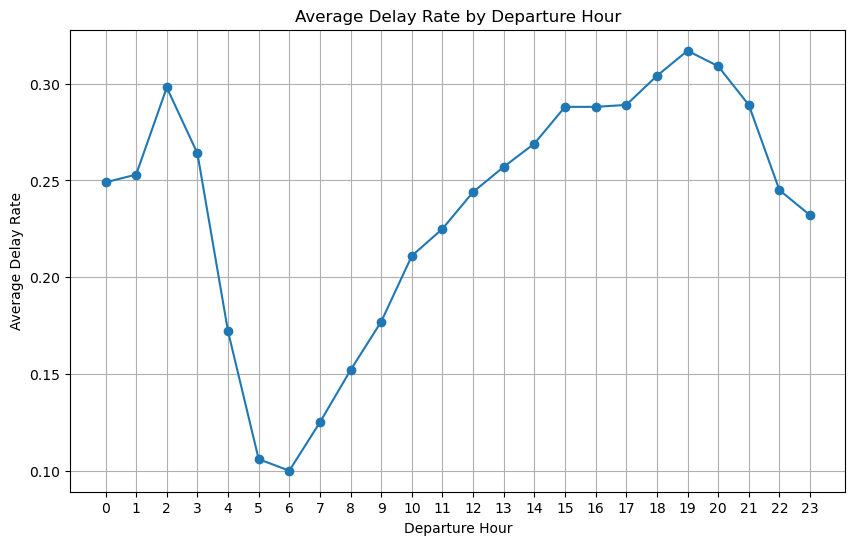

In [80]:
import pandas as pd
import matplotlib.pyplot as plt

features = [
    'DayOfWeek', 'DepHour', 'IsWeekend', 'IsRushHour',
    'Distance', 'DistanceGroup', 'CRSElapsedTime', 'Flights',
    'Origin_encoded', 'Dest_encoded', 'Airline_encoded'
]

importance_df = pd.DataFrame({
    'feature': features,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print("TOP 10 DELAY PREDICTORS:")
print(importance_df.head(10))

# Show delay patterns
print(f"\nDELAY PATTERNS BY HOUR:")
delay_by_hour = ml_df.groupby('DepHour')['DepDel15'].mean().round(3)
print(delay_by_hour)

plt.figure(figsize=(10, 6))
plt.plot(delay_by_hour.index, delay_by_hour.values, marker='o')
plt.title('Average Delay Rate by Departure Hour')
plt.xlabel('Departure Hour')
plt.ylabel('Average Delay Rate')
plt.grid()
plt.xticks(range(0, 24))
plt.show()


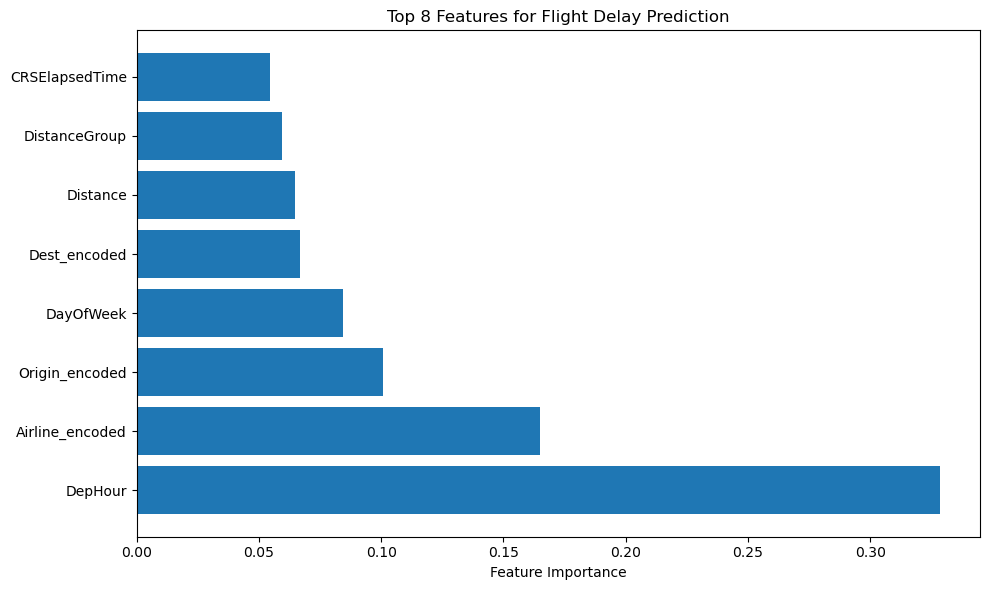

In [81]:
plt.figure(figsize=(10, 6))
plt.barh(importance_df.head(8)['feature'], importance_df.head(8)['importance'])
plt.title('Top 8 Features for Flight Delay Prediction')
plt.xlabel('Feature Importance')
plt.tight_layout()
plt.show()

In [82]:
# import joblib

# model.save_model('./model/flight_delay_model.json')

# joblib.dump(encoder_origin, './model/origin_encoder.pkl')
# joblib.dump(encoder_dest, './model/dest_encoder.pkl') 
# joblib.dump(encoder_airline, './model/airline_encoder.pkl')

In [84]:
print(ml_df['Flights'].unique())

[1.]


In [ ]:
def predict_flight_delay(origin, dest, airline, day_of_week, dep_hour):
    origin_enc = encoder_origin.transform([origin])[0]
    dest_enc = encoder_dest.transform([dest])[0]
    airline_enc = encoder_airline.transform([airline])[0]

    features = [
        day_of_week,    # 1=Monday, 7=Sunday
        dep_hour,       # 0-23 
        1 if day_of_week in [6,7] else 0,  # IsWeekend
        1 if dep_hour in [7,8,17,18,19] else 0,  # IsRushHour
        1000,           # Distance (placeholder)
        4,              # DistanceGroup (placeholder)
        120,            # CRSElapsedTime (placeholder)
        1,              # Flights (placeholder)
        origin_enc,     # Encoded origin
        dest_enc,       # Encoded destination  
        airline_enc     # Encoded airline
    ]
    
    # Get prediction
    probability = model.predict_proba([features])[0][1]
    return probability

# Test it!
delay_prob = predict_flight_delay('ATL', 'LAX', 'AA', 2, 18)  
print(f"Delay probability: {delay_prob:.1%}")


Delay probability: 34.8%


In [ ]:
route_df = ml_df[['Origin', 'Dest', 'Distance', 'DistanceGroup', 'CRSElapsedTime']].drop_duplicates()

In [ ]:
route_df['Route'] = route_df['Origin'] + '-' + route_df['Dest']
print(route_df.head())

  Origin Dest  Distance  DistanceGroup  CRSElapsedTime    Route
0    MHT  EWR     209.0              1           104.0  MHT-EWR
1    IAD  EWR     212.0              1            79.0  IAD-EWR
2    EWR  MHT     209.0              1            76.0  EWR-MHT
3    STL  ORD     258.0              2            88.0  STL-ORD
4    STL  IAD     696.0              3           123.0  STL-IAD


In [ ]:
route_df['Origin_enc'] = encoder_origin.transform(route_df['Origin'])
route_df['Dest_enc'] = encoder_dest.transform(route_df['Dest'])

In [ ]:
print(route_df.head())

  Origin Dest  Distance  DistanceGroup  CRSElapsedTime    Route  Origin_enc  \
0    MHT  EWR     209.0              1           104.0  MHT-EWR         215   
1    IAD  EWR     212.0              1            79.0  IAD-EWR         158   
2    EWR  MHT     209.0              1            76.0  EWR-MHT         112   
3    STL  ORD     258.0              2            88.0  STL-ORD         319   
4    STL  IAD     696.0              3           123.0  STL-IAD         319   

   Dest_enc  
0       112  
1       112  
2       215  
3       238  
4       158  


In [ ]:
X_dist = route_df[['Origin_enc', 'Dest_enc']]
y_distance = route_df['Distance']
y_distance_group = route_df['DistanceGroup']
y_crs_elapsed = route_df['CRSElapsedTime']

In [ ]:
distance_model = xgb.XGBRegressor(random_state=42)
distance_model.fit(X_dist, y_distance)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [ ]:
distance_group_model = xgb.XGBRegressor(random_state=42)
distance_group_model.fit(X_dist, y_distance_group)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [ ]:
crs_elapsed_model = xgb.XGBRegressor(random_state=42)
crs_elapsed_model.fit(X_dist, y_crs_elapsed)


,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [ ]:
distance_model.save_model('./model/distance_model.json')
distance_group_model.save_model('./model/distance_group_model.json')
crs_elapsed_model.save_model('./model/crs_elapsed_model.json')

In [ ]:
print(len(route_df['Origin'].unique()))

print(len(route_df['Dest'].unique()))

print(set(route_df['Origin'].unique()) == set(route_df['Dest'].unique()))

351
351
True


In [ ]:
location_list = route_df['Origin'].unique()

In [ ]:
print(location_list)
#save as csv
location_list = pd.DataFrame(location_list, columns=['locations'])
location_list.to_csv('./location_list.csv', index=False)

['MHT' 'IAD' 'EWR' 'STL' 'RIC' 'ORD' 'DCA' 'LNK' 'SCE' 'ITH' 'MDT' 'IAH'
 'CPR' 'HOB' 'TYS' 'COD' 'LBB' 'SGF' 'DEN' 'LFT' 'MOB' 'BRO' 'HSV' 'MFE'
 'JAN' 'LIT' 'CHO' 'AMA' 'PNS' 'TUL' 'LCH' 'PVD' 'ROA' 'DRO' 'SAF' 'BHM'
 'CRP' 'MAF' 'ECP' 'GPT' 'ICT' 'CAE' 'ALB' 'DAY' 'PHL' 'AVL' 'CLT' 'AVP'
 'DTW' 'XNA' 'ELP' 'OKC' 'DFW' 'SRQ' 'SDF' 'ATL' 'LGA' 'SAT' 'MSY' 'AUS'
 'RAP' 'PHX' 'PIT' 'TUS' 'PWM' 'JAX' 'MEM' 'IND' 'MSP' 'SAV' 'HRL' 'BIL'
 'MCI' 'BNA' 'IDA' 'GUC' 'SYR' 'CLE' 'DSM' 'CVG' 'ABQ' 'BTR' 'CMH' 'BDL'
 'LRD' 'SHV' 'BUF' 'COS' 'ORF' 'GSO' 'ILM' 'RDU' 'MSN' 'GRR' 'ROC' 'GRB'
 'PQI' 'CHS' 'BZN' 'BTV' 'OMA' 'FSD' 'MTJ' 'PIA' 'SLC' 'GJT' 'MKE' 'TVC'
 'FNT' 'GSP' 'MLI' 'CID' 'CAK' 'PSP' 'RNO' 'RSW' 'SAN' 'SBA' 'SEA' 'SFO'
 'SJC' 'SJU' 'SMF' 'SNA' 'TPA' 'VPS' 'BLI' 'BOI' 'BOS' 'BUR' 'BWI' 'DAL'
 'EUG' 'FAT' 'FLL' 'GEG' 'HDN' 'HNL' 'HOU' 'ISP' 'ITO' 'KOA' 'LAS' 'LAX'
 'LGB' 'LIH' 'MCO' 'MDW' 'MIA' 'MYR' 'OAK' 'OGG' 'ONT' 'PBI' 'PDX' 'JFK'
 'EYW' 'ORH' 'HPN' 'LEX' 'BGR' 'STT' 'BQN' 'TLH' 'P

In [ ]:
airline_list = ml_df['Marketing_Airline_Network'].unique()
print(airline_list)

#save as csv
airline_list = pd.DataFrame(airline_list, columns=['airlines'])
airline_list.to_csv('./airline_list.csv', index=False)

['UA' 'WN' 'AA' 'DL' 'B6' 'F9' 'G4' 'HA' 'NK' 'AS']
